In [2]:
# Import Librariers

# Third Party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
import time
import tikzplotlib

In [3]:
# alpso_output = 'Simpleblade_Output_ALPSO_print.out'
# start_string = 'NUMBER OF ITERATIONS:'
# 
# array = []
# columns = []
# current_eval = 0
# with open(alpso_output, 'r') as alpso:
#     for line_number, line in enumerate(alpso):
#         if start_string in line:
#             current_eval = int([i for i in line.split()][-1])    
#             array.append([])
#             
#         if current_eval > 0:
#             split_line = line.split()
#             
#             for idx, x in enumerate(split_line):
#                 if x == '=':
#                     array[current_eval - 1].append(float(split_line[idx+1]))
#                     
#             if current_eval == 1:
#                 for idx, x in enumerate(split_line):
#                     if x == '=':
#                         columns.append(split_line[idx-1])
# 
# solution = pd.DataFrame(array, columns=columns)

solution = pd.read_csv('solution_35-03_99-70_catia_2.csv', index_col=(0))
solution

,F,G(0),G(1),G(2),G(3),G(4),G(5),G(6),G(7),G(8),...,P(21),P(22),P(23),P(24),P(25),P(26),P(27),P(28),P(29),P(30)
0,0.317386,-0.350589,-0.375663,-0.429155,-0.123177,-0.404674,-0.428658,-0.107586,-0.295163,-0.473305,...,0.396107,0.564637,0.775105,0.700000,0.267957,0.700000,0.634053,0.462552,0.000000,0.552828
1,0.525362,-0.285634,-0.422851,-0.426876,-0.188953,-0.408969,-0.343252,-0.321064,-0.434992,-0.388330,...,0.471543,0.626357,0.654637,0.700000,0.375698,0.668278,0.581962,0.300000,0.075681,0.527635
2,0.361049,-0.332821,-0.349161,-0.401029,-0.198202,-0.396837,-0.300274,-0.206511,-0.438205,-0.348444,...,0.491106,0.606060,0.355865,0.680134,0.299694,0.614093,0.327889,0.300000,0.084567,0.557325
3,0.386235,-0.413194,-0.325333,-0.401978,-0.347373,-0.256862,-0.187289,-0.297068,-0.413652,-0.419768,...,0.543634,0.607486,0.291886,0.700000,0.276155,0.577142,0.258471,0.355994,0.043558,0.540179
4,0.420393,-0.452607,-0.411618,-0.400618,-0.340630,-0.357343,-0.252908,-0.275267,-0.399317,-0.437886,...,0.419987,0.558387,0.266537,0.700000,0.283877,0.566136,0.350081,0.349047,0.055910,0.491854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.000010,-0.407587,0.000915,-0.000161,-0.000200,0.000318,0.000113,-0.000333,0.000871,0.000503,...,0.203305,0.321776,0.112289,0.698861,0.066698,0.610407,0.064302,0.355250,0.000000,0.312132
159,0.000030,-0.399595,-0.001197,-0.000166,-0.000465,0.000546,0.000203,-0.000261,0.000129,-0.000489,...,0.203297,0.321683,0.112447,0.699912,0.066759,0.611116,0.064282,0.354738,0.000077,0.312110
160,0.000000,-0.405705,-0.000245,0.000763,-0.000477,0.000636,-0.000580,-0.000054,-0.000416,-0.001026,...,0.203190,0.322102,0.112566,0.700000,0.066625,0.610743,0.064317,0.355185,0.000158,0.311907
161,0.000000,-0.406084,-0.000626,-0.000562,-0.000433,0.000129,0.000705,-0.001364,-0.000366,-0.000008,...,0.203195,0.321420,0.112650,0.700000,0.066635,0.610497,0.063720,0.360239,0.000000,0.311955


In [4]:
@interact(plot='F')
def plot_solution(plot):
    fig2, ax2 = plt.subplots()    
    solution.plot(y=plot, ax=ax2, style='.-')
    # solution.plot(y='P(0)', ax=ax2, style='.-')
    
    ax2.set_xlabel('Iteration')
    ax2.set_xlim(0,len(solution['F']))
    ax2.grid(True,which= 'major',linestyle= '--')
    fig2.set_figwidth(25.5)
    
    


interactive(children=(Text(value='F', description='plot'), Output()), _dom_classes=('widget-interact',))

In [5]:
@interact(eval=widgets.IntSlider(min=-1, max=len(solution['F'])-1, step=1, value=len(solution['F'])-1))
def plot_eval(eval):
    i_f = solution.iloc[eval, [i+1 for i in range(20)]]
    i_m = solution.iloc[eval, [i+21 for i in range(20)]]
    rho = solution.iloc[eval, [i*2+110 for i in range(14)]]
    div = solution.iloc[eval, [i*2+111 for i in range(14)]]
    
    fig, ax = plt.subplots(figsize=(25.5,15))

    plt.subplot(4, 1, 1)
    
    plt.plot(list(i_f), marker='x')
    plt.grid(True,which= 'major',linestyle= '--')
    plt.xlim(0,19)
    plt.ylim(-0.6,0.05)
    plt.xlabel('Section')
    plt.ylabel('I_f')
    plt.xticks(np.linspace(0,19,20))
    plt.plot([[-1+solution['P(0)'][eval]] for i in range(14)],linestyle= '--',color='black',linewidth=1)
    plt.plot([[1-solution['P(0)'][eval]] for i in range(14)],linestyle= '--',color='black',linewidth=1)

    
    plt.subplot(4, 1, 2)
    
    plt.plot(list(i_m), marker='x')
    plt.grid(True,which= 'major',linestyle= '--')
    plt.xlim(0,19)
    plt.ylim(-1,0.5)
    plt.xlabel('Section')
    plt.ylabel('I_m')
    plt.xticks(np.linspace(0,19,20))
    
    plt.subplot(4,1,3)
    
    plt.plot(list(rho), marker='x')
    plt.grid(True,which= 'major',linestyle= '--')
    plt.xlim(0,19)
    plt.ylim(0,1)
    plt.xlabel('Section')
    plt.ylabel('rho')
    plt.xticks(np.linspace(0,19,20))
    
    plt.subplot(4,1,4)
    
    plt.plot(list(div), marker='x')
    plt.grid(True,which= 'major',linestyle= '--')
    plt.xlim(0,19)
    plt.ylim(0.3,0.7)
    plt.xlabel('Section')
    plt.ylabel('div')
    plt.xticks(np.linspace(0,19,20))

interactive(children=(IntSlider(value=162, description='eval', max=162, min=-1), Output()), _dom_classes=('wid…

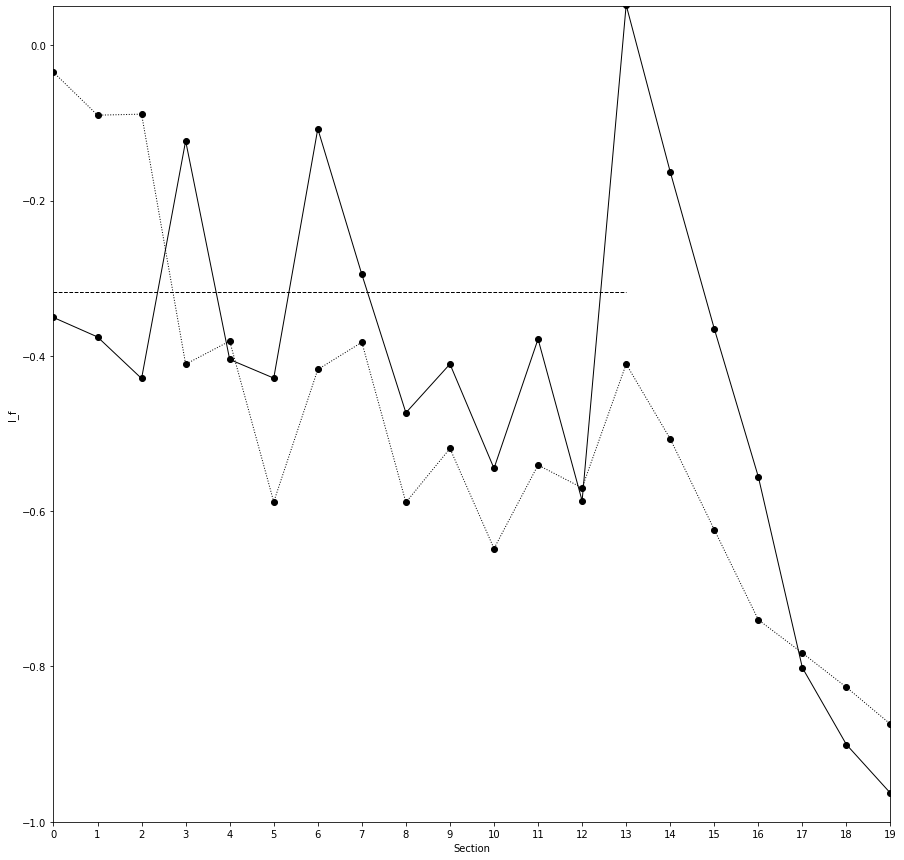

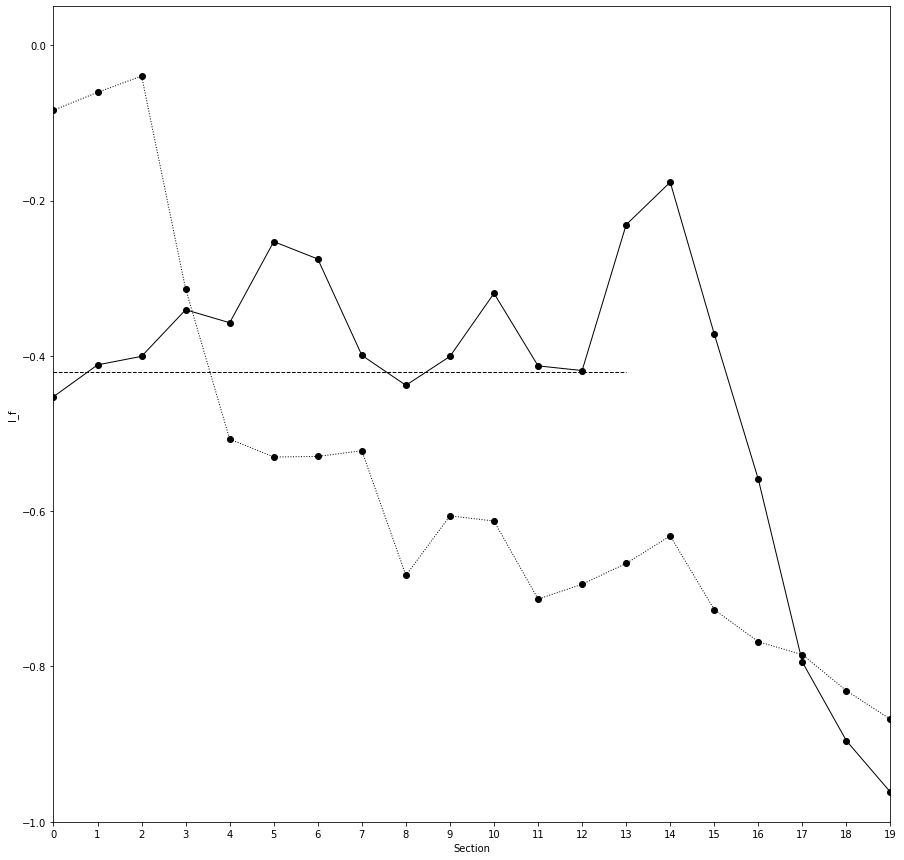

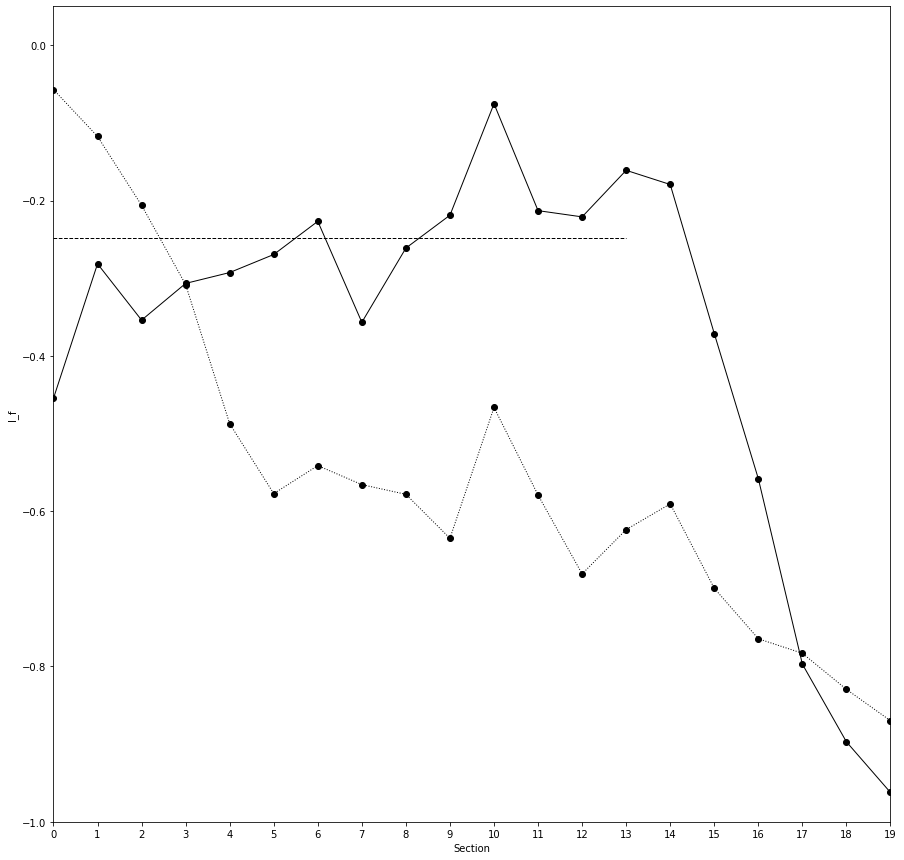

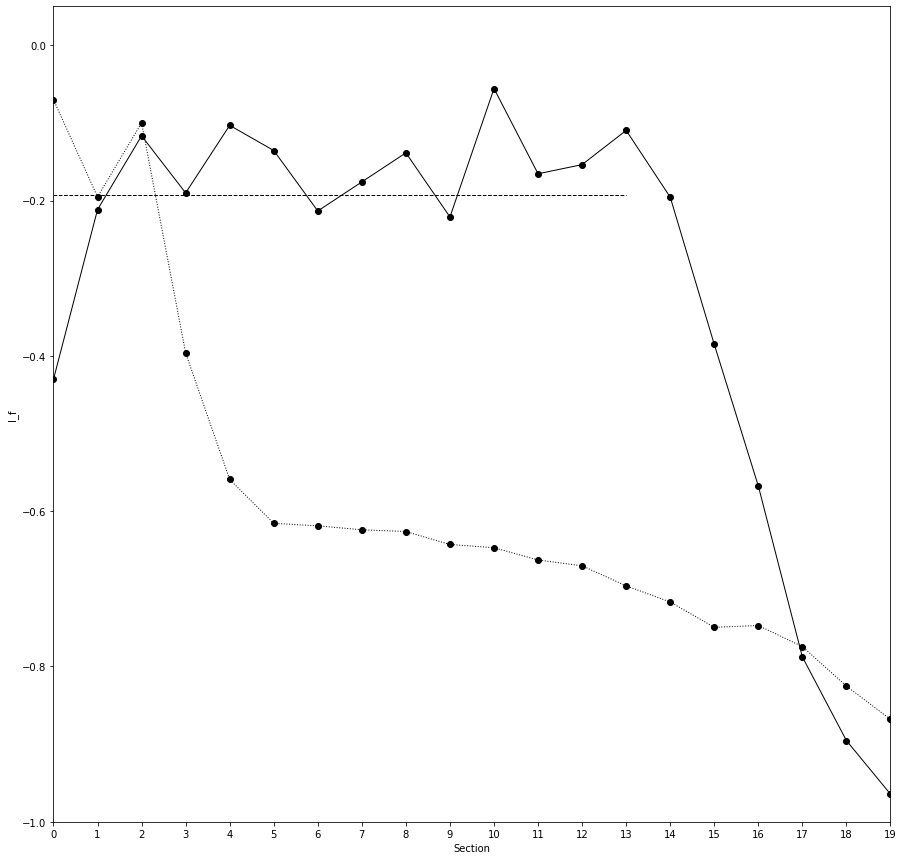

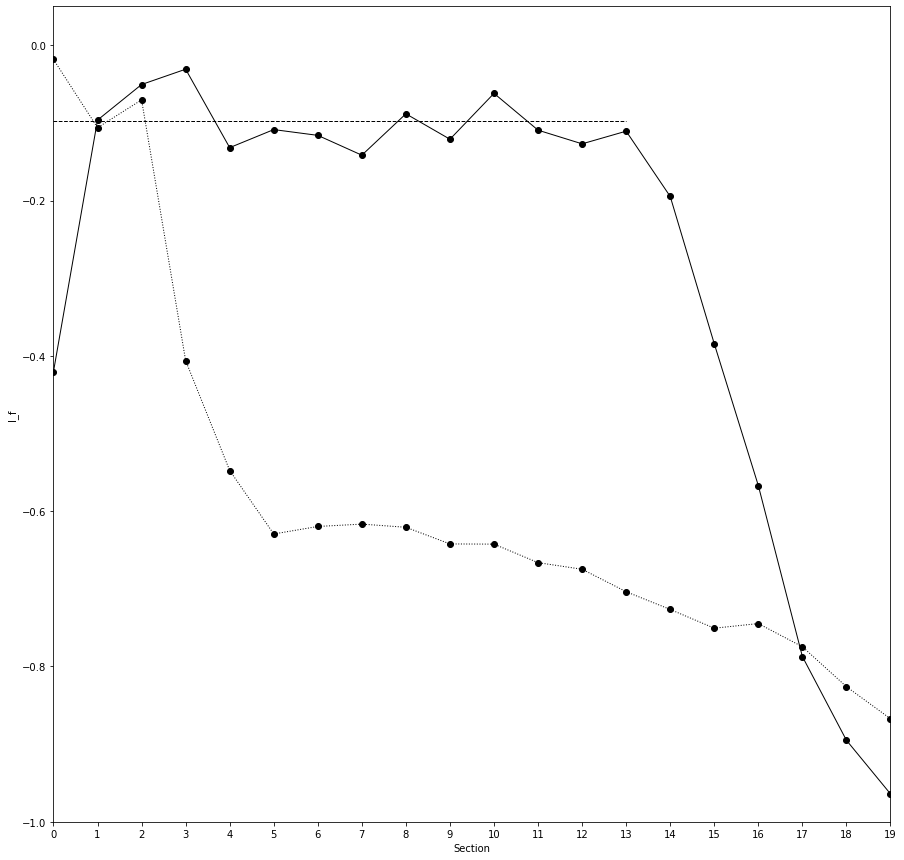

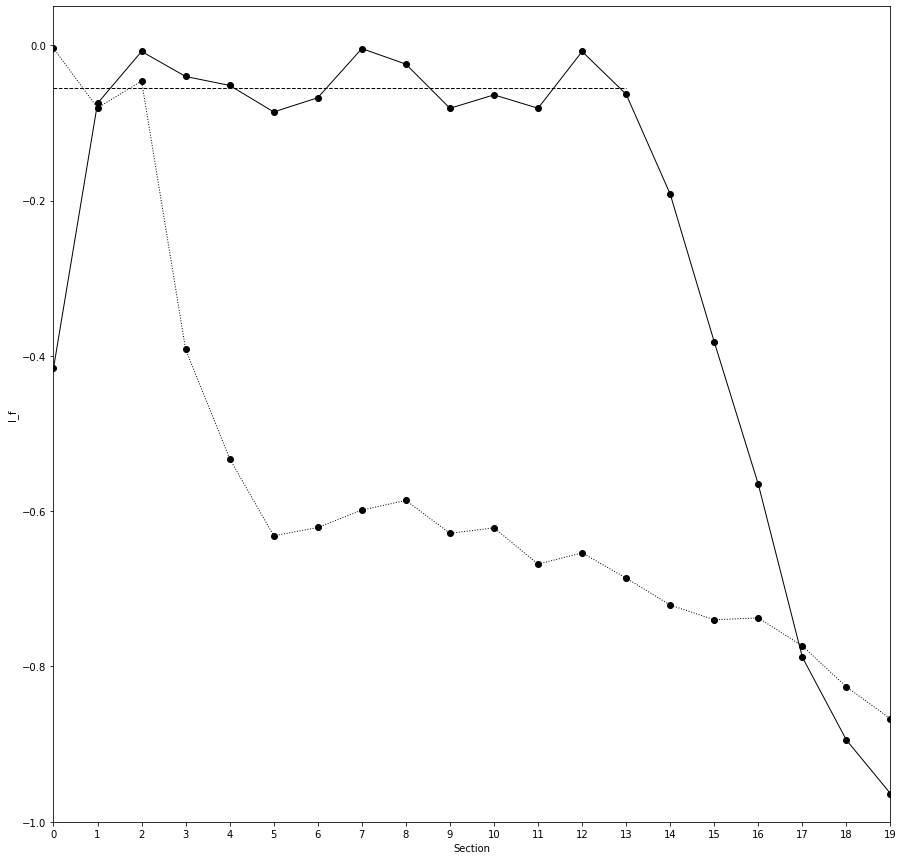

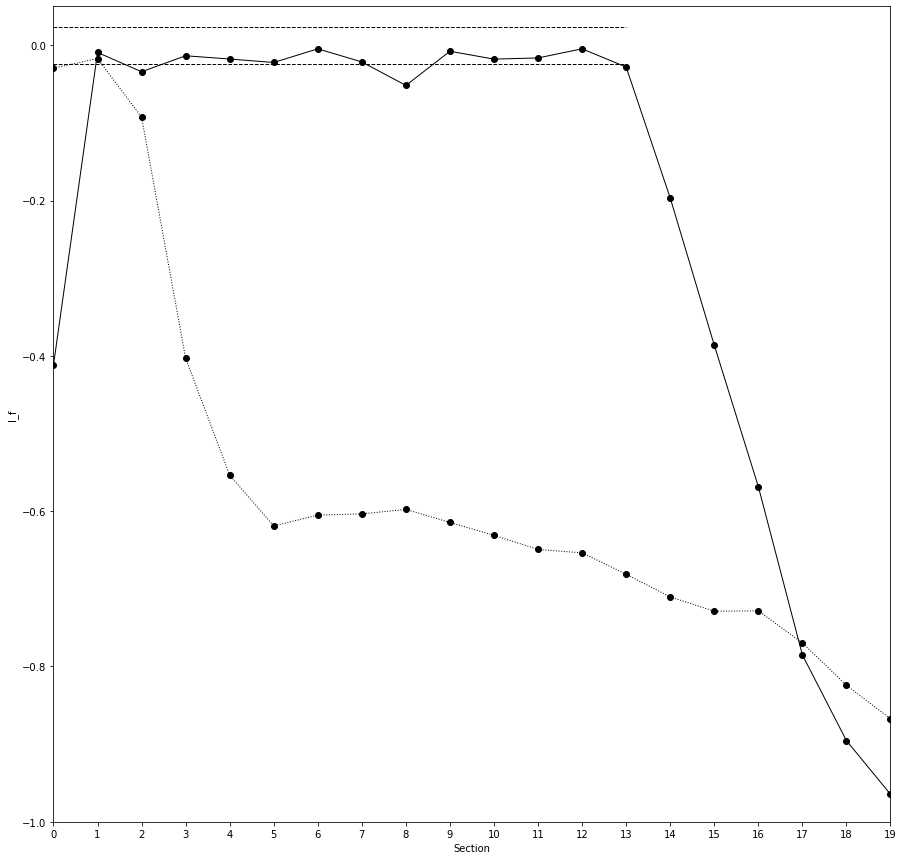

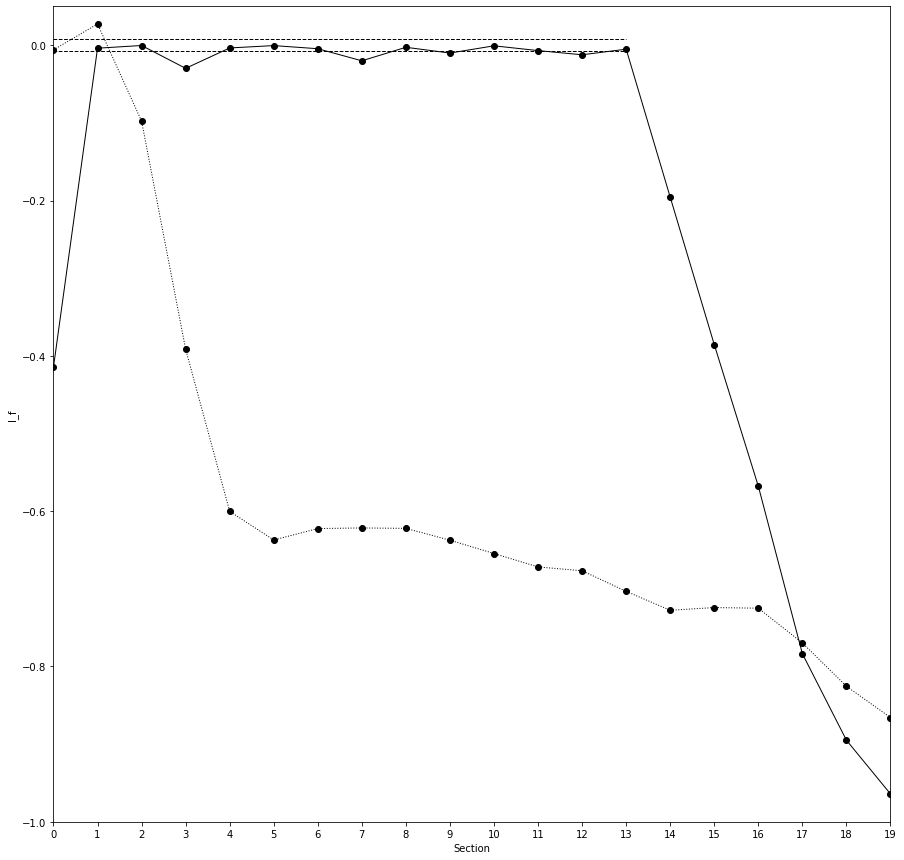

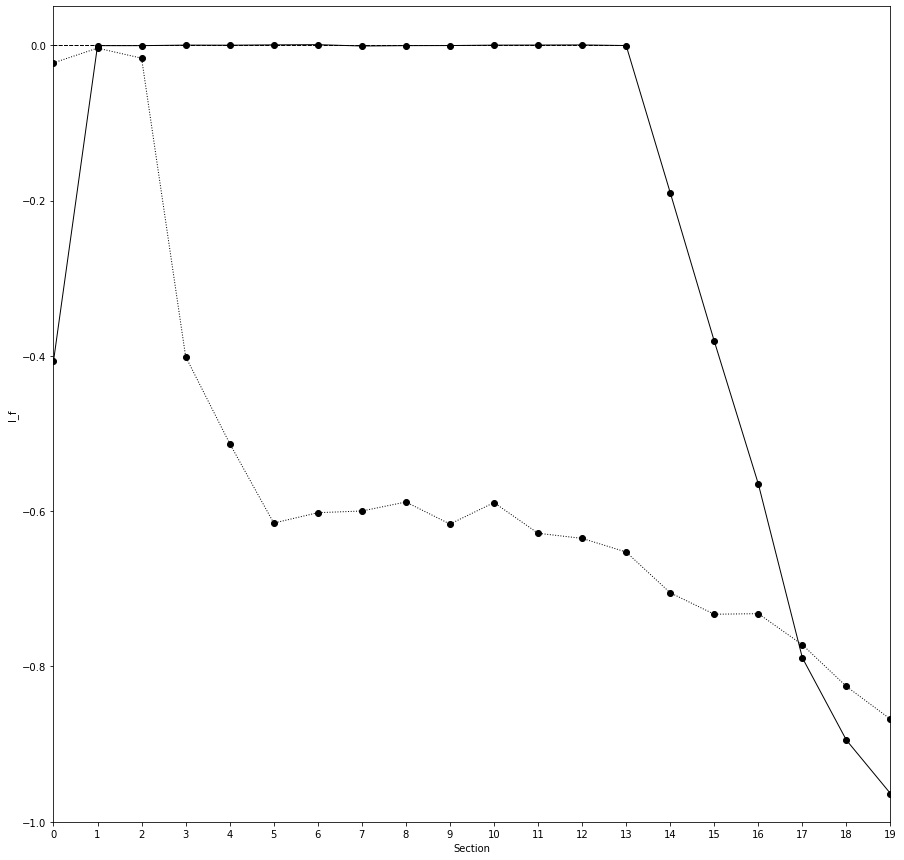

In [30]:

evals=[0,4,9,14,19,24,34,44,162]

for eval in evals:
    fig, ax = plt.subplots(figsize=(15, 15))
    i_f = solution.iloc[eval, [i+1 for i in range(20)]]
    i_m = solution.iloc[eval, [i+21 for i in range(20)]]

    plt.plot(list(i_f), 
             marker='o',
             color='black',
             linewidth=1,
             )

    plt.plot(list(i_m),
             marker='o',
             linestyle='dotted',
             linewidth=1,
             color='black',)

    #plt.grid(True,which= 'major',linestyle= '--')
    plt.xlim(0,19)
    plt.ylim(-1,0.05)
    plt.xlabel('Section')
    plt.ylabel('I_f')
    plt.xticks(np.linspace(0,19,20))
    plt.plot([[-1+solution['P(0)'][eval]] for i in range(14)],linestyle= '--',color='black',linewidth=1)
    plt.plot([[1-solution['P(0)'][eval]] for i in range(14)],linestyle= '--',color='black',linewidth=1)
    
    tikzplotlib.save('anstrengungen%d.tex' % (eval))